In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec

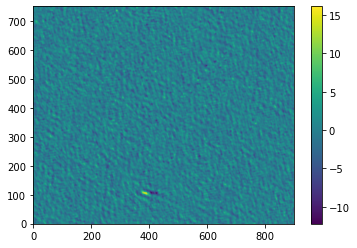

In [2]:
hdu1 = fits.open("cleaned1-image.fits")
hdu2 = fits.open("cleaned2-image.fits")
time1 = datetime.strptime(hdu1[0].header['DATE-OBS'], '%Y-%m-%dT%H:%M:%S.%f')
time2 = datetime.strptime(hdu2[0].header['DATE-OBS'], '%Y-%m-%dT%H:%M:%S.%f')
wcs = WCS(hdu1[0].header, naxis=2)
diff = hdu2[0].data[0,0,:,:] - hdu1[0].data[0,0,:,:]
plt.imshow(diff[450:1200, 600:1500], origin="lower")
plt.colorbar()

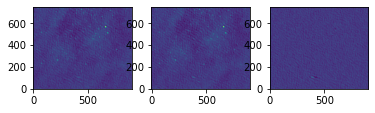

In [3]:

img1 = hdu1[0].data[0,0,:,:]
img2 = hdu2[0].data[0,0,:,:]

plt.subplot(131)
plt.imshow(img1[450:1200, 600:1500], origin="lower",vmax=50,vmin=-10)

plt.subplot(132)
plt.imshow(img2[450:1200, 600:1500], origin="lower",vmax=50,vmin=-10)

plt.subplot(133)
plt.imshow(diff[450:1200, 600:1500], origin="lower",vmax=50,vmin=-10)


<IPython.core.display.Javascript object>


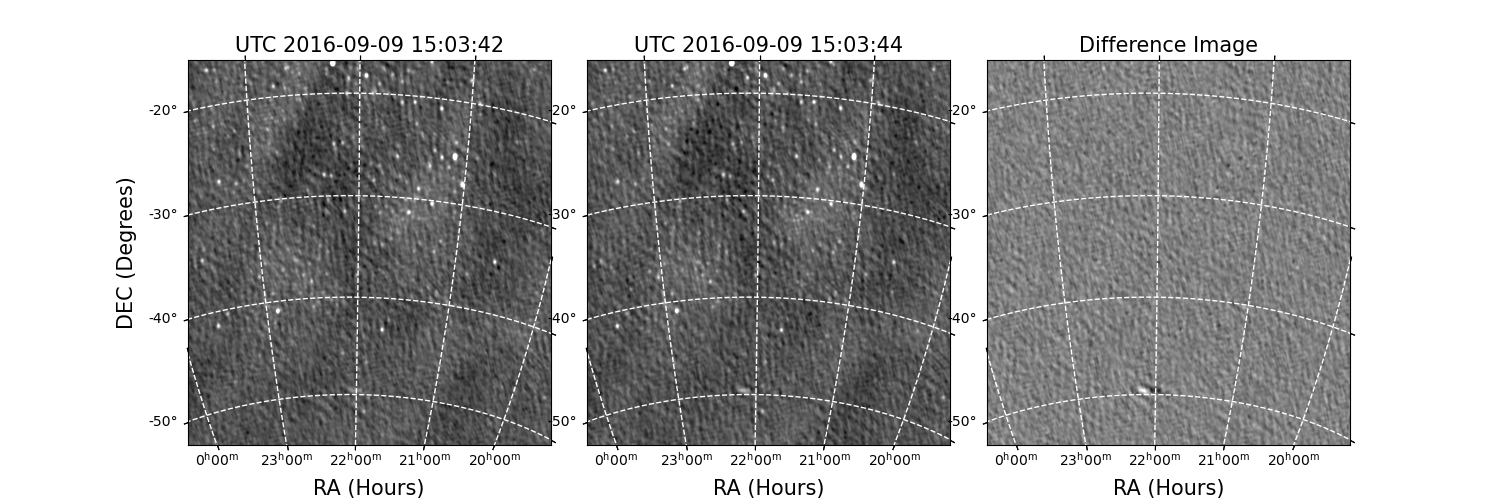

<ipython-input-25-6ac208e908e1>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("differenceImaging.png",dpi=300, layout="tight")


In [25]:
%matplotlib notebook
fig, ax = plt.subplots(1,3, figsize=(15,5), subplot_kw={'projection': wcs}, gridspec_kw={"wspace": 0.1})
hfont = {'fontname':'Helvetica', 'size':15}
cmap = plt.cm.gray
ax[0].imshow(img1, origin="lower",vmax=20,vmin=-10,aspect="auto", cmap=cmap)
ax[0].set_xlim(600,1500)
ax[0].set_ylim(450,1200)
ax[0].set_title("UTC {}".format(time1), **hfont)
ax[0].grid(color='white', linestyle="dashed", linewidth=1)
ax[0].set_ylabel("DEC (Degrees)", **hfont)
ax[0].set_xlabel("RA (Hours)", **hfont)

ax[1].imshow(img2, origin="lower",vmax=20,vmin=-10,aspect="auto", cmap=cmap)
ax[1].set_title("UTC {}".format(time2), **hfont)
ax[1].set_xlim(600,1500)
ax[1].set_ylim(450,1200)
ax[1].grid(color='white', linestyle="dashed", linewidth=1)
ax[1].set_xlabel("RA (Hours)", **hfont)
ax[1].set_ylabel(" ")

ax[2].imshow(diff, origin="lower",vmax=15,vmin=-15,aspect="auto", cmap=cmap)
ax[2].set_xlim(600,1500)
ax[2].set_ylim(450,1200)
ax[2].set_title("Difference Image", **hfont)
ax[2].grid(color='white', linestyle="dashed", linewidth=1)
ax[2].set_xlabel("RA (Hours)", **hfont)
ax[2].set_ylabel(" ")
plt.savefig("differenceImaging.png",dpi=300, layout="tight")